<a href="https://colab.research.google.com/github/ThiagoMilanezPinheiro/MachineLearning-SGBF/blob/main/1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UT-GEOML/GEO391/blob/main/regression/Regression.ipynb)

# Well log analysis: SPWLA 2020 Petrophysical Data-Driven Analytics Contest

[SWPLA](https://www.spwla.org/) (Society of Petrophysicists and Well Log Analysts) organized a contest to test the ability of machine-learning algorithms to analyze well-log information.

## Background information

https://github.com/pddasig/Machine-Learning-Competition-2020

Well logs are interpreted/processed to estimate the in-situ petrophysical and geomechanical properties, which is essential for subsurface characterization. Various types of logs exist, and each provides distinct information about subsurface properties. Certain well logs, like gamma ray (GR), resistivity, density, and neutron logs, are considered as “easy-to-acquire” conventional well logs that are run in most of the wells. Other well logs, like nuclear magnetic resonance, dielectric dispersion, elemental spectroscopy, and sometimes sonic logs, are only run in limited number of wells.

![](https://wiki.seg.org/images/7/78/Segs13.jpg) 

[Sonic travel-time logs](https://wiki.seg.org/wiki/Dictionary:Sonic_log) contain critical geomechanical information for subsurface characterization around the wellbore. Often, sonic logs are required to complete the well-seismic tie workflow or geomechanical properties prediction. When sonic logs are absent in a well or an interval, a common practice is to synthesize them based on its neighboring wells that have sonic logs. This is referred to as sonic log synthesis or pseudo sonic log generation.

### Download data

In [ ]:
!wget https://github.com/pddasig/Machine-Learning-Competition-2020/raw/master/Data3_1_2020.zip

--2021-10-28 18:23:27--  https://github.com/pddasig/Machine-Learning-Competition-2020/raw/master/Data3_1_2020.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pddasig/Machine-Learning-Competition-2020/master/Data3_1_2020.zip [following]
--2021-10-28 18:23:27--  https://raw.githubusercontent.com/pddasig/Machine-Learning-Competition-2020/master/Data3_1_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 982106 (959K) [application/zip]
Saving to: ‘Data3_1_2020.zip’

Data3_1_2020.zip    100%[===================>] 959.09K  --.-KB/s    in 0.02s   

2021-10-28 18:23:27 (47.4 MB/s) - ‘Data3_1_20

In [ ]:
# Extract training data

import zipfile
with zipfile.ZipFile('Data3_1_2020.zip','r') as zipf:
    zipf.extract('train.csv')

The data is in the form of a CSV (comma-separated values) file. Different rows correspond to different depth levels in the borehole, and different columns correspond to different logs. 

We will use [pandas](https://pandas.pydata.org/), Python data analysis library, for managing data.

In [ ]:
import pandas as pd

In [ ]:
# load data from CSV file

logs = pd.read_csv('train.csv')
logs.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [ ]:
# data information
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     30143 non-null  float64
 1   CNC     30143 non-null  float64
 2   GR      30143 non-null  float64
 3   HRD     30143 non-null  float64
 4   HRM     30143 non-null  float64
 5   PE      30143 non-null  float64
 6   ZDEN    30143 non-null  float64
 7   DTC     30143 non-null  float64
 8   DTS     30143 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [ ]:
# data attributes
logs.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


## Meaning of different columns

| Key | Description | Unit |
|-----|-------------|------|
| **CAL** | Caliper log | inch |
| **CNC** | Neuron log  | dec  |
| **GR**  | Gamma Ray log | API |
| **HRD** | Deep Resistivity log | Ohm per meter |
| **HRM** | Medium Resistivity log  | Ohm per meter |
| **PE**  | Photo-Electric Factor log | Barn |
| **ZDEN**| Density log | grams per cubic meter |
| **DTC** | Compressional Travel-time log | nanosecond per foot |
| **DTS** | Shear Travel-time log | nanosecond per foot |

Values set to -999 mark missing values.

## Attempt to predict sonic from density

We will start by selecting only logs: ZDEN and DTC and will attempt to predict one from the other using a simple linear regression. The attempt may not succeed but it will illustrate the general setup of the problem.

First, let us drop missing or anomalous values and examine the data distribution.

In [ ]:
import numpy as np

# select two logs 
two = logs.loc[:,['ZDEN','DTC']]
# replace -999 with NaN
two.replace(-999, np.nan, inplace=True)
# drop rows with NaN
two.dropna(inplace=True)
# data information
two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25516 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25516 non-null  float64
 1   DTC     25516 non-null  float64
dtypes: float64(2)
memory usage: 598.0 KB


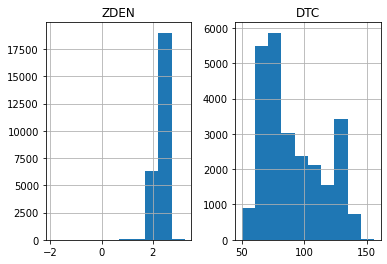

In [ ]:
# display histogram
hist = two.hist()

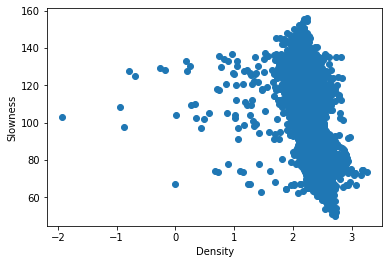

In [ ]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(two.ZDEN, two.DTC)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

In [ ]:
# remove anomalous density values
two2=two.loc[(two.ZDEN > 1.5) & (two.ZDEN < 3.1)]
two2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25442 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25442 non-null  float64
 1   DTC     25442 non-null  float64
dtypes: float64(2)
memory usage: 596.3 KB


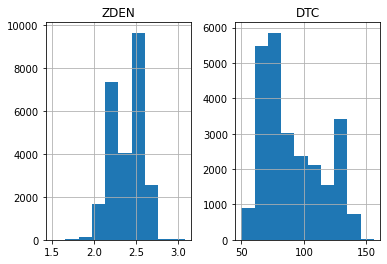

In [ ]:
two2_hist = two2.hist()

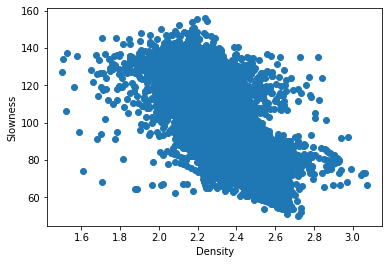

In [ ]:
plt.scatter(two2.ZDEN, two2.DTC)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

The dependence is not simple but we can observe a general trend of slowness decreasing with density. Next, we will try to approximate this dependence with a straight line by using *linear regression*, a classic tool from statistics.

How do we know if our model works? We can divide the data in two parts: training and testing. We can then use the training part to fit the model and the testing part to validate the result. We will select 80% of the data for training and the remaining 20% for validation.

In [ ]:
# divide into training and testing
select = np.random.rand(len(two2)) < 0.8
train = two2[select]
test = two2[~select]

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20317 entries, 573 to 30141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20317 non-null  float64
 1   DTC     20317 non-null  float64
dtypes: float64(2)
memory usage: 476.2 KB


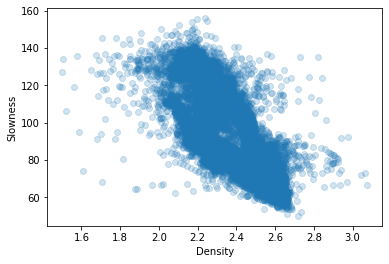

In [ ]:
plt.scatter(train.ZDEN, train.DTC,alpha=0.2)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

## Linear regression

Linear regression, together with more sophisticated models, is provided by [scikit-learn](https://scikit-learn.org/), a package for classic machine learning algorithms.

In [ ]:
# create model
from sklearn import linear_model
model = linear_model.LinearRegression()

# train model
model.fit(train[['ZDEN']], train['DTC'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our first model has only two parameters: the intercept $a$ and the slope $b$ and in the equation
$$s(\rho)=a+b\,\rho\;.$$
Fitting the model means estimating these parameters from the data.

In [ ]:
# regression coefficients
print ('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

Intercept:  341.5525977514193
Coefficients:  [-104.8978207]


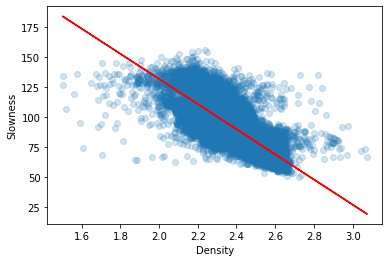

In [ ]:
plt.scatter(train.ZDEN, train.DTC,alpha=0.2)
plt.plot(train.ZDEN, model.intercept_ + train.ZDEN*model.coef_[0], '-r')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

Now we can turn to the testing data and see how well our model predicts it. 

There are different ways to measure the error. If $p_n$ are predicted values, and $v_n$ are actual values, the classic linear regression is using the least-squares misfit $\displaystyle \sum_{n=1}^{N} (p_n - v_n)^2$.

The root-mean-square error is defined as $\displaystyle  \sqrt{\frac{1}{N} \sum_{n=1}^{N} (p_n - v_n)^2}$.

In [ ]:
# evaluate prediction error
want = test['DTC']
get = model.predict(test[['ZDEN']])

print("RMS error: %.3f" % np.sqrt(np.mean((get-want)**2)))

from sklearn.metrics import mean_squared_error

print("RMS error: %.3f" % mean_squared_error(get,want,squared=False))

RMS error: 14.383
RMS error: 14.383


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error??

## How does it work?

Parameters of the model are estimated by minimizing the desired objective function. In the case of linear regression, the dependence on parameters is quadratic, and the minimum is found analytically. In the more general case, the minimization is achieved by some form of gradient descent.

In [ ]:
def least_squares(a,b):
    d = train['ZDEN']
    s = train['DTC']
    return mean_squared_error(a+b*d,s,squared=False)

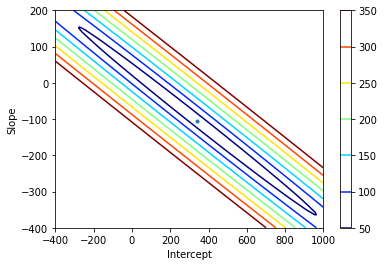

In [ ]:
a, b = np.meshgrid(
    np.linspace(start = -400, stop = 1000, num = 101),
    np.linspace(start = -400, stop = 200, num = 101))
error = np.vectorize(least_squares)(a,b)

# plot surface
plt.contour(a,b,error,[50,100,150,200,250,300,350],cmap='jet')
plt.plot(model.intercept_,model.coef_[0], marker='.')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.colorbar()
plt.show()

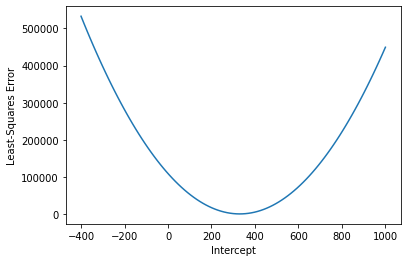

In [ ]:
a=np.linspace(start = -400, stop = 1000, num = 101)
error = np.vectorize(least_squares)(a,-100)**2
plt.plot(a,error)
plt.xlabel('Intercept')
plt.ylabel('Least-Squares Error')
plt.show()

## How can we improve it?

One approach to complicate the dependence would be to extend the model, for example from a line to a parabola.

In [ ]:
# extend the model with density raised to degree 2
train=train.assign(ZDEN2=np.power(train.ZDEN,2))
train.describe()

,ZDEN,DTC,ZDEN2
count,20317.000000,20317.000000,20317.000000
mean,2.389573,90.891616,5.743439
std,0.182710,23.985777,0.863135
min,1.501600,49.970500,2.254803
25%,2.222400,71.058800,4.939062
50%,2.429000,83.365300,5.900041
75%,2.554400,109.955800,6.524959
max,3.073500,155.980300,9.446402


In [ ]:
# create model
model2 = linear_model.LinearRegression()

# train model
model2.fit(train[['ZDEN','ZDEN2']], train['DTC'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# regression coefficients
print ('Intercept: ', model2.intercept_)
print('Coefficients: ', model2.coef_)

Intercept:  162.3986147934023
Coefficients:  [ 47.86474814 -32.36445705]


The model changes from 
$$s(\rho) = a + b\,\rho$$
to 
$$s(\rho) = a + b_1\,\rho + b_2\,\rho^2$$
and involves three parameters ($a,b_1,b_2$) instead of two ($a,b$) as in the previous case.

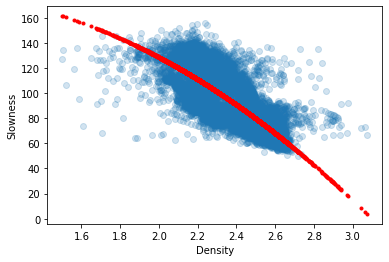

In [ ]:
plt.scatter(train.ZDEN, train.DTC,alpha=0.2)
parabola = model2.intercept_ + train.ZDEN*model2.coef_[0] + train.ZDEN2*model2.coef_[1]
plt.plot(train.ZDEN,parabola,'.r')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

In [ ]:
test=test.assign(ZDEN2=np.power(test.ZDEN,2))

want = test['DTC']
get2 = model2.predict(test[['ZDEN','ZDEN2']])

print("RMS error: %.3f" % mean_squared_error(get2,want,squared=False))

RMS error: 14.376


## <span style="color:red">Task 1</span>

Can you improve the fit further by using a higher-degree polynomial?

$$s(\rho) = a_0 + b_1\,\rho + b_2\,\rho^2 + b_3\,\rho^3 + \cdots + b_N\,\rho^N$$

Choose $N \ge 3$ and add code below to try it out.

## More inputs

Another way to extend the model is to involve other logs.

Let us try the Gamma-ray log in addition to the density log.

In [ ]:
# select two logs 
three = logs.loc[:,['ZDEN','GR','DTC']]
# replace -999 with NaN
three.replace(-999, np.nan, inplace=True)
# drop rows with NaN
three.dropna(inplace=True)
# data information
three.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25473 entries, 573 to 30142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25473 non-null  float64
 1   GR      25473 non-null  float64
 2   DTC     25473 non-null  float64
dtypes: float64(3)
memory usage: 796.0 KB


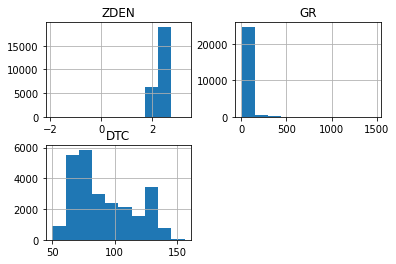

In [ ]:
three_hist = three.hist()

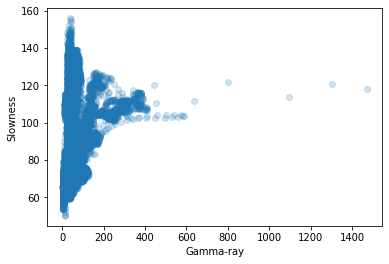

In [ ]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(three.GR, three.DTC,alpha=0.2)
plt.xlabel('Gamma-ray')
plt.ylabel('Slowness')
plt.show()

In [ ]:
# remove anomalous density values and anomalous gamma-ray values
three2=three.loc[(three.ZDEN > 1.5) & (three.ZDEN < 3.1) & (three.GR < 400)]
three2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25372 entries, 573 to 30142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25372 non-null  float64
 1   GR      25372 non-null  float64
 2   DTC     25372 non-null  float64
dtypes: float64(3)
memory usage: 792.9 KB


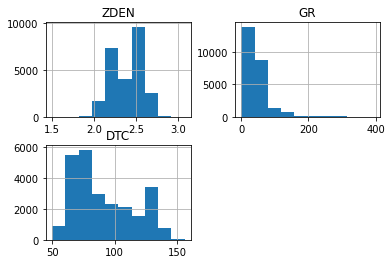

In [ ]:
three2_hist = three2.hist()

In [ ]:
# divide into training and testing
select3 = np.random.rand(len(three2)) < 0.8
train3 = three2[select3]
test3 = three2[~select3]

train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20314 entries, 574 to 30141
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20314 non-null  float64
 1   GR      20314 non-null  float64
 2   DTC     20314 non-null  float64
dtypes: float64(3)
memory usage: 634.8 KB


In [ ]:
# create model
model3 = linear_model.LinearRegression()

# train model
model3.fit(train3[['ZDEN','GR']], train3['DTC'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The model changes from 
$$s(\rho) = a + b\,\rho$$
to 
$$s(\rho,\gamma) = a + b\,\rho + c\,\gamma$$
and also involves three parameters ($a,b,c$) instead of two ($a,b$). 

It represents a plane in the three-dimensional space instead of a line in the two-dimensional space.

In [ ]:
# regression coefficients
print ('Intercept: ', model3.intercept_)
print('Coefficients: ', model3.coef_)

Intercept:  321.35259016289086
Coefficients:  [-98.845979     0.12560908]


In [ ]:
want3 = test3['DTC']
get3 = model3.predict(test3[['ZDEN','GR']])

print("RMS error: %.3f" % mean_squared_error(get3,want3,squared=False))

RMS error: 13.265


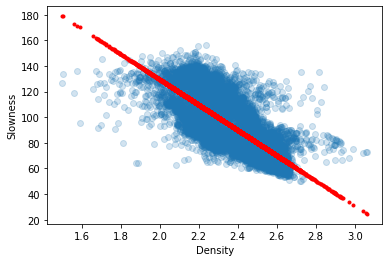

In [ ]:
plt.scatter(train3.ZDEN, train3.DTC,alpha=0.2)
plt.plot(train3.ZDEN, model3.intercept_ + train3.ZDEN*model3.coef_[0] + np.mean(train3.GR)*model3.coef_[1], '.r')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

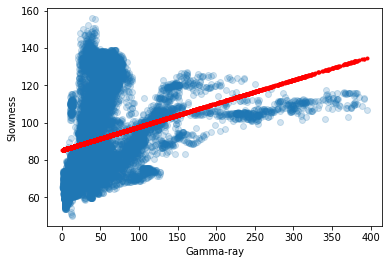

In [ ]:
plt.scatter(train3.GR, train3.DTC,alpha=0.2)
plt.plot(train3.GR, model3.intercept_ + np.mean(train3.ZDEN)*model3.coef_[0] + train3.GR*model3.coef_[1], '.r')
plt.xlabel('Gamma-ray')
plt.ylabel('Slowness')
plt.show()

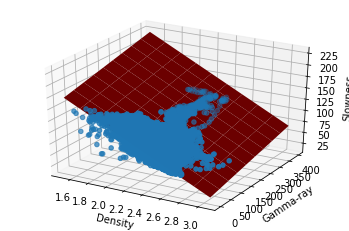

In [ ]:
D = np.linspace(np.min(train3.ZDEN),np.max(train3.ZDEN),10)
G = np.linspace(np.min(train3.GR),np.max(train3.GR),10)
D,G = np.meshgrid(D,G)
S = model3.intercept_ + D*model3.coef_[0] + G*model3.coef_[1]

axes = plt.axes(projection='3d')
axes.scatter(train3.ZDEN,train3.GR,train3.DTC)
axes.plot_surface(D,G,S,color='red')
axes.set_xlabel('Density')
axes.set_ylabel('Gamma-ray')
axes.set_zlabel('Slowness')
plt.show()

## <span style="color:red">Task 2</span>

Can you improve the fit further by using more logs for prediction in addition to density and gamma-ray?

$$s(l_1,l_2,\cdots,l_N) = a_0 + b_1\,l_1 + b_2\,l_2  + \cdots + b_N\,l_N$$

Choose $N \ge 3$ and add code below to try it out.

## Conclusions

Simple linear regression is obviously too primitive to be of much practical use in this case. 

However, it illustrates general principles of supervised learning:

1. We desire to be able to predict one part of the data from the other parts.
2. To make a prediction, we build a model, which depends on parameters.
3. The parameters are estimated from training data by minimizing an objection function, which measures the prediction error.
4. Minimization generally involves a form of gradient descent (analytical in the case of linear regression).
5. Part of the training data can be used for validation.
6. There is uncertainty in the parameter estimation and in the model prediction.

## <span style="color:red">Bonus Task 3</span>

Continue using the Linear Regression approach but try to improve the results by non-linear transformations of the dependent variables. The task is open-ended, but here are some possibilities to explore:

* Try predicting velocity (1/slowness) instead of slowness.
* [Gardner's equation](https://wiki.seg.org/wiki/Dictionary:Gardner%E2%80%99s_equation) suggests an empirical relationship between density and velocity of the form

$$\rho = \alpha\,v^{\beta}\;,$$

where the parameters $\alpha$ and $\beta$ depend on lithology.

Taking the logarithm of both sides,

$$\log \rho = \log{\alpha} + \beta\,v\ = \log{\alpha} - \beta\,s\;.$$

This suggests using the logarithm of density instead of density or its powers in the linear regression model.
* Try other non-linear functions of logs in addition to multiple logs as independent variables in linear regression.